# Magnotether Experimental Comparison Between Looping and Static LED

This jupyter notebook will display figures and statistics regarding this comparison and try to develop some conclusions regarding this analysis.

All figures are developed will be placed in the figs folder labeled based on the section number within the notebook. 

`Ex: Fig-1_1 which corresponds to Figure from the first subsection of section 1`

See the Table of contents below in order to navigate to the different sections of the notebook.

### VERSION NOTICE (v1.1)
- `exact_exp_groups.py` as been changed such that we are now able to properly extract static and loop data in same manner. This means that the algorithm for splitting the vertical connections can soon be applied...
- Preliminary Loop Analysis Has Been Finalized


### VERSION NOTICE (v1.0)
- Current version is meant to have a working base comparison method
- Next version will focus on the method of duplication and creation of fresh directory for the user to work and to ensure that the baseline file is in a read-only mode but the user will be able to edit subsequent copies...

## Table of Contents

-------------------------------------------------
[Import Relevant Packages](#import-libraries)

-------------------------------------------------
[1. Static Data Analysis](#1-static-data-analysis)

> [1.1 Static Data Import](#11-data-import)

> [1.2 Initial Plot of Static Experiment](#12-initial-plot-of-static-experiment)

> [1.3 Plot of Female Fly Data](#13-plot-of-female-fly-data)

> [1.4 Plot of Female Fly Data Relative to LED](#14-plot-of-female-fly-data-relative-to-led)

> [1.5 Polar Plot Female Fly Data (Relative to LED)](#15-polar-plot-female-fly-data-relative-to-led)

----------------------------------------------------
[2. Loop Data Analysis](#2-loop-data-analysis)

> [2.1 Loop Data Import](#21-data-import)

> [2.2 Initial Plot of Section of Loop Experiment](#22-initial-plot-of-section-of-loop-experiment)

> [2.3 Plot of Female Fly Data Relative To LED](#23-plot-of-female-fly-data-relative-to-led)

> [2.4 Offset Plot for Loop Data](#24-offset-plot-for-loop-data)

> [2.5 Polar Plot (Relative to LED)](#25-offset-plot-polar-plot)


#### (Optional) Additional Information For Data Access
> For using this jupyter notebook a lot of the analysis considers images located on an external machine (unless you are currently using that machine). This notebook thus has data import methods for both external access and direct access of the image files.

For the external access ensure that the following is completed... However, the majority of analysis images that will be analyzed will be included within this repo. The inital formulation of these images and getting more images saved directly will require the external access which is why it is recommended that the following steps are followed:

1. Set mount point in home directory
```
mkdir magno_mount
```

2. Using SSHFS set the mount
```
sshfs flyranch@IPADDRESS: /home/username/magno_mount/
```

3. Connection has been established now you can navigate to the proper directory

This will be done later within this notebook as well for the access of the images, but if you are wanting to look at some of these 
images on your own machine within the mount point this is the directory that will be used
```
cd image_data/20231121/fly1/20231121124749/
```

With the relevant dependancies and connections established, proceed through the rest of the notebook.

## Import Libraries

In [1]:
import sys
import os
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
# plot_dir = os.path.join(current_dir,'plotting')
sys.path.append(current_dir)
# print(sys.path)
from lib.plotting import polarplot as polarplt# polar plotting module
from lib.parsing import basic_sections as bsc_sec # basic data parsing methods
from lib.parsing.data_range import find_startdata, find_enddata # setting start and end of analysis region 
from lib.parsing.exact_exp_groups import sub_exp_group  # more dataparsing methods
from lib.led_convert import get_LED_angle_in_rad

c:\Users\lkrow\vscodeProjects\My-Repos-Warren-Lab\flyplot
Initialized Plotting Package
Initialized Parsing Package


## 1. Static Data Analysis

#### 1.1 Data Import

In [2]:
# data source
fem_dat_static ='data/20231228154547.txt'
# female fly heading and led position data
df_fem_static = pd.read_csv(fem_dat_static, names = ['time','fly heading','led position'],sep = " ")

# compute change over time
df_fem_static['delta-t'] = df_fem_static['time'] - df_fem_static['time'][0] 

# compute LED position in degrees
df_fem_static['led angle'] = np.rad2deg(get_LED_angle_in_rad(df_fem_static['led position'])) 

# get subgroups
fem_dict_static = sub_exp_group(df_fem_static)
print(fem_dict_static)
print(len(fem_dict_static))

-1 -1 [0, 8]
150 150 [8, 911]
stat
[911, None]
stat
0
50 14 [911, 2779]
14 121 [2778, 4646]
121 87 [4645, 6546]
87 150 [6545, 8379]
150 150 [8378, 9302]
{'cali1': [0, 8], 'dark1': [8, 911], 'stat1': [911, 2779], 'stat2': [2778, 4646], 'stat3': [4645, 6546], 'stat4': [6545, 8379], 'dark2': [8378, 9302]}
7


#### 1.2 Initial Plot of Static Experiment 


Text(0, 0.5, 'Heading/LED Angle')

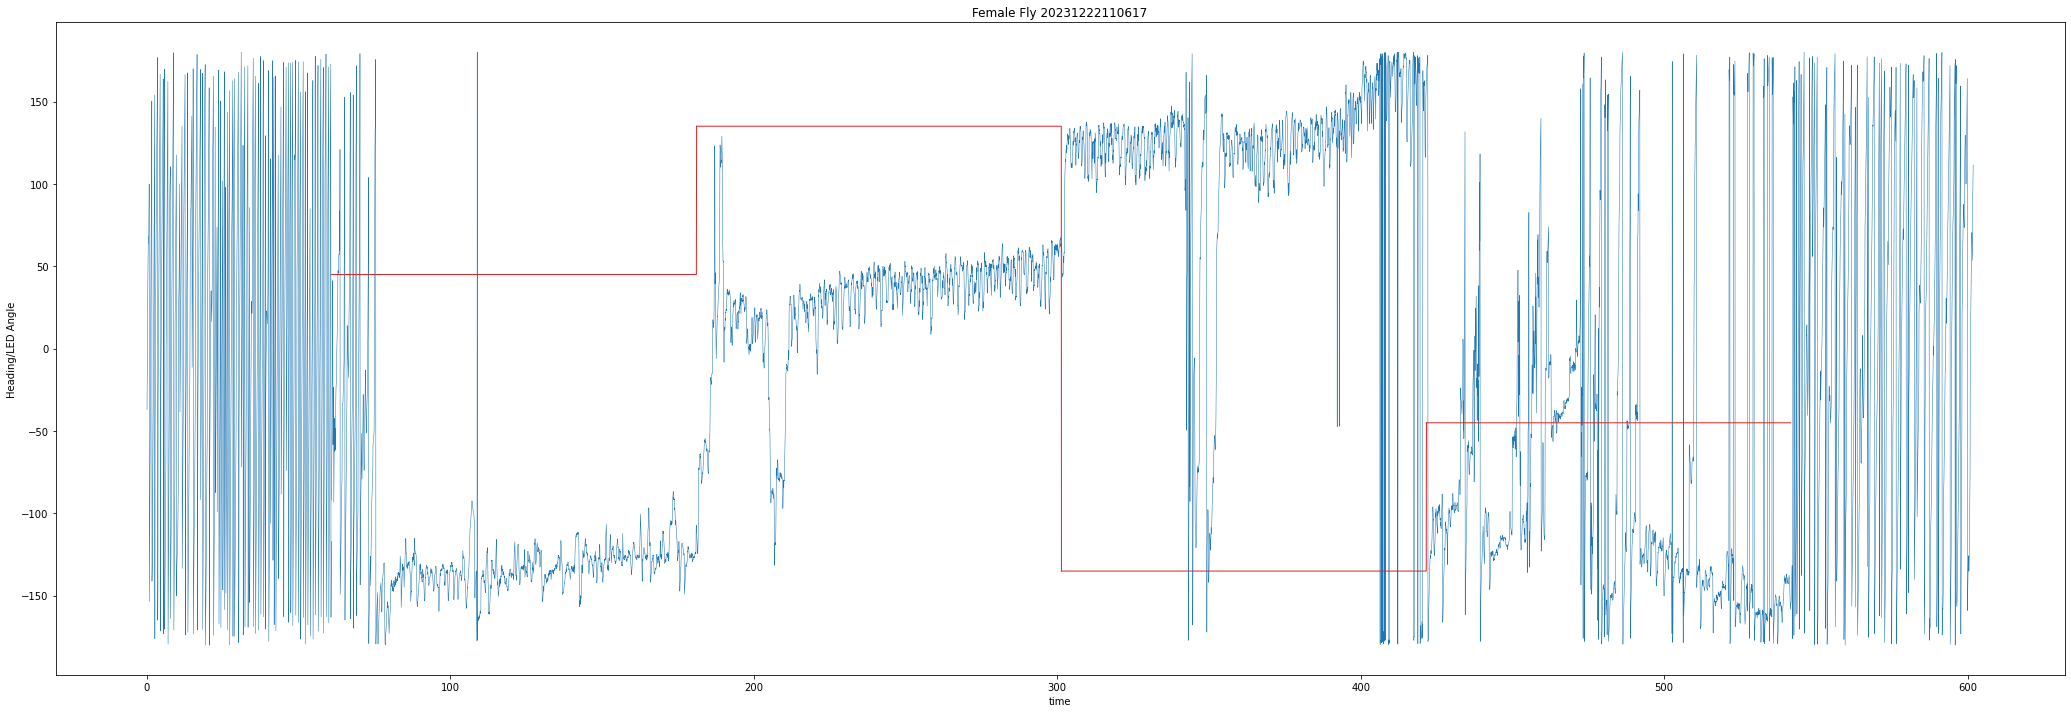

In [3]:
plt.figure(figsize=(36,12))
# iterate over the sections
for k in list(fem_dict_static.keys()):
    start = fem_dict_static[k][0]
    end = fem_dict_static[k][1]
    # print(start,end)
    plt.plot(df_fem_static['delta-t'][start:end],df_fem_static['fly heading'][start:end],color = 'tab:blue', linewidth = .5, label = 'Heading')
    plt.plot(df_fem_static['delta-t'][start:end],df_fem_static['led angle'][start:end],color = 'tab:red', linewidth = 1, label = 'LED')
plt.title("Female Fly 20231222110617")
plt.xlabel("time")
plt.ylabel("Heading/LED Angle")

#### 1.3 Plot of Section


In [4]:
# Starting with dark period
start1_idx,_= fem_dict_static[find_startdata('dark',1,df_fem_static, fem_dict_static)]
_,end1_idx  = fem_dict_static[find_enddata('dark',1,df_fem_static, fem_dict_static)]
# Then we jump a long ways until the period in question
start2_idx,_= fem_dict_static[find_startdata('stat',2,df_fem_static, fem_dict_static)]
_,end2_idx  = fem_dict_static[find_enddata('stat',3,df_fem_static, fem_dict_static)]
print(start1_idx,end1_idx)
print(start2_idx,end2_idx)
groups_static = ['dark1','stat2','stat3']

8 911
2778 6546


([<matplotlib.axis.YTick at 0x15cc8cf0e80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

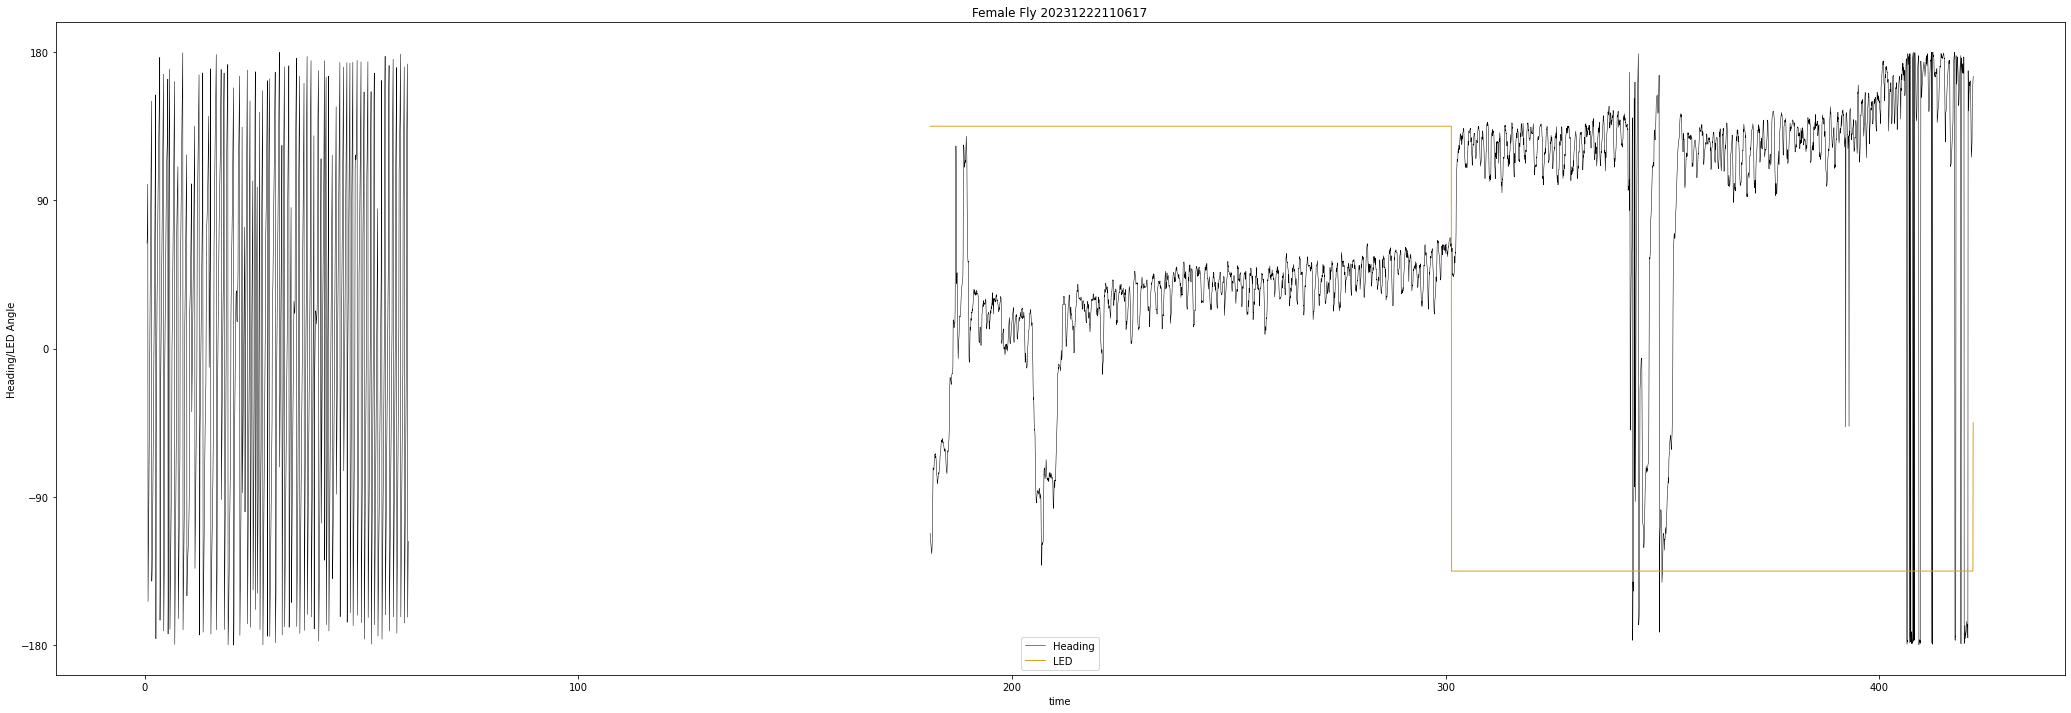

In [5]:
plt.figure(figsize=(36,12))
for count, k in enumerate(groups_static):
    start = fem_dict_static[k][0]
    end = fem_dict_static[k][1]
    plt.plot(df_fem_static['delta-t'][start:end],df_fem_static['fly heading'][start:end],color = 'k', linewidth = .5, label ='Heading')
    plt.plot(df_fem_static['delta-t'][start:end],df_fem_static['led angle'][start:end], color = 'goldenrod', linewidth = 1, label = 'LED')
    if count == 0:
        plt.legend(loc='lower center')
plt.title("Female Fly 20231222110617")
plt.xlabel("time")
plt.ylabel("Heading/LED Angle")
plt.yticks(np.arange(-180,181,90))


#### 1.4 Plot of Female Fly Data Relative to LED
- Adjusted based on initial Static LED that is usued in experiment...

Starting LED: 14 135.0
9.218473987540536
-104.50292504096066
-2.184593653722459


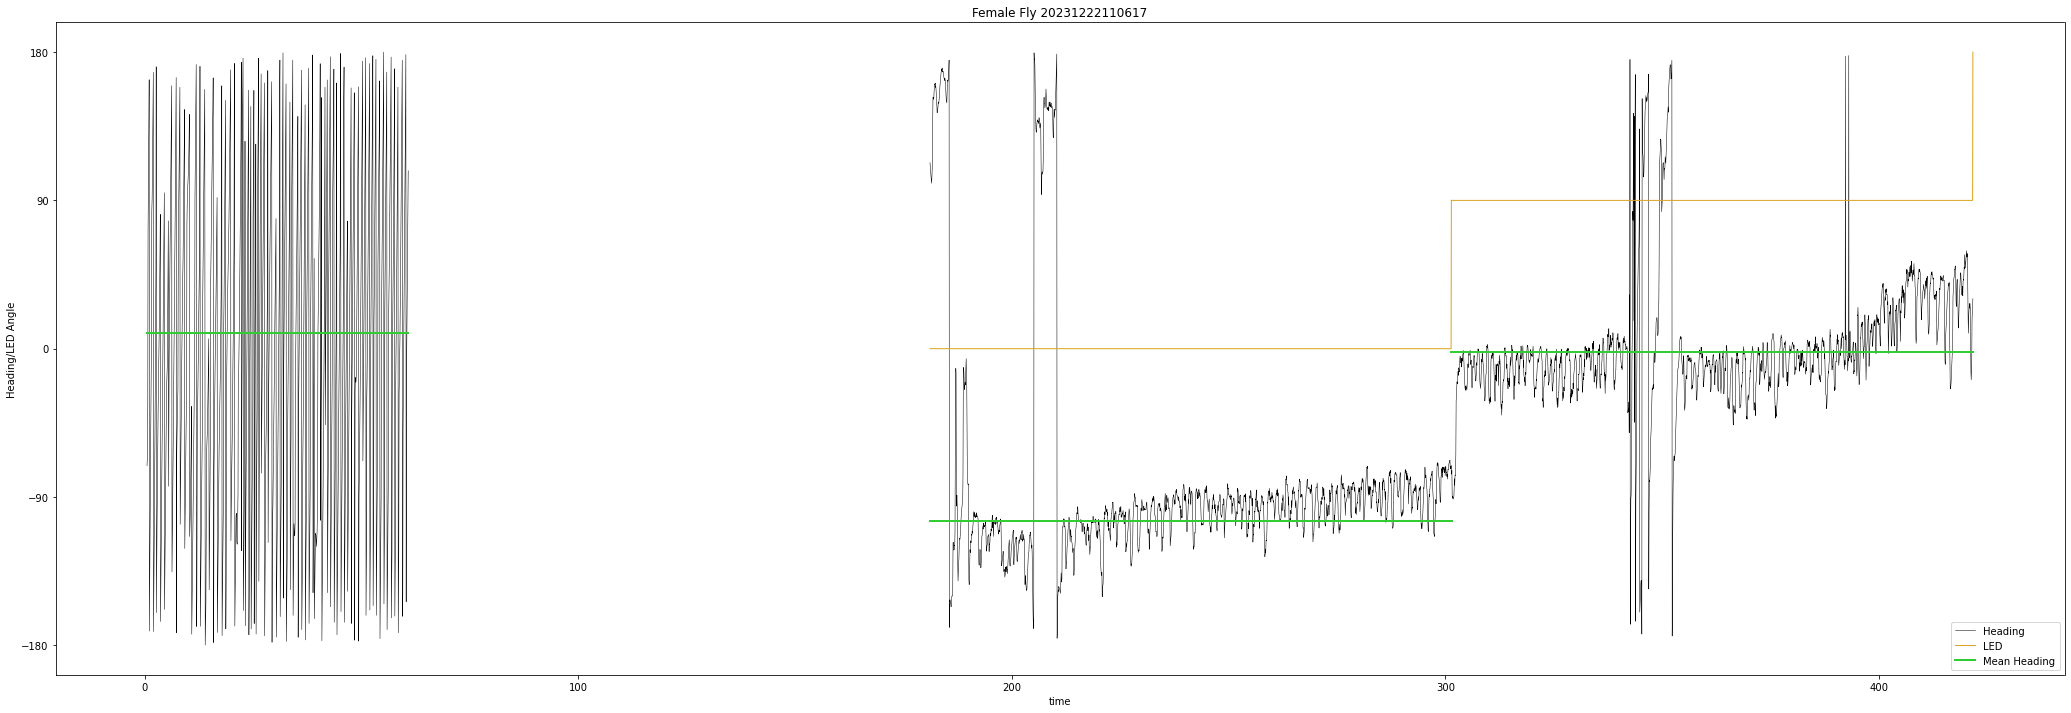

In [6]:
plt.figure(figsize=(36,12))

start_led,start_led_angle = bsc_sec.get_led_position(start2_idx,df_fem_static)
print("Starting LED:",start_led,start_led_angle)
# Main Plot 



for count, k in enumerate(groups_static):
    start = fem_dict_static[k][0]
    end = fem_dict_static[k][1]
    plt.plot(df_fem_static['delta-t'][start:end],polarplt.deg360to180_arr(df_fem_static['fly heading'][start:end]-start_led_angle),color = 'k', linewidth = .5, label = 'Heading')
    plt.plot(df_fem_static['delta-t'][start:end],polarplt.deg360to180_arr(df_fem_static['led angle'][start:end]-start_led_angle),color = 'goldenrod', linewidth = 1, label = 'LED')
    # mean heading...
    vec_str , mean_drxn = polarplt.calc_mean_and_vector_strength((df_fem_static['fly heading'][start:end]-start_led_angle))
    heading = polarplt.deg360to180(np.rad2deg(mean_drxn))
    print(heading)
    plt.plot((df_fem_static['delta-t'].loc[start],df_fem_static['delta-t'].loc[end]),(heading,heading),color = 'limegreen', linewidth = 2, label = 'Mean Heading')
    # ax2.plot(df_fem_static['delta-t'][start:end],polarplt.deg360to180_arr(df_fem_static['fly heading'][start:end]-df_fem_static['led angle'][start:end]),color = 'limegreen', linewidth = .5, label = 'Relative Heading')
    if count == 0:
        plt.legend(loc = "lower right")

plt.title("Female Fly 20231222110617")
plt.xlabel("time")
plt.ylabel("Heading/LED Angle")
plt.yticks(np.arange(-180,181,90))
plt.savefig('figs/head_led_static.svg',facecolor = 'white')



#### 1.5 Polar Plot Female Fly Data (Relative to LED)
- Questions:
    - which plot is preferred? Right now plotting the heading, but can apply the shift, as well as the shift and the difference between the LED angle and the heading as done in the next section...

dark1
 Vector Strength:0.046, Mean Heading: 144.2134770344282
stat2
 Vector Strength:0.845, Mean Heading: 30.4813547009598
stat3
 Vector Strength:0.843, Mean Heading: 132.81161691132482


C:\Users\lkrow\AppData\Local\Temp\ipykernel_35604\3019613705.py:24: UserWarning: Legend does not support 'g' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(colors, labels)
C:\Users\lkrow\AppData\Local\Temp\ipykernel_35604\3019613705.py:24: UserWarning: Legend does not support 'b' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(colors, labels)
C:\Users\lkrow\AppData\Local\Temp\ipykernel_35604\3019613705.py:24: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(colors, labels)


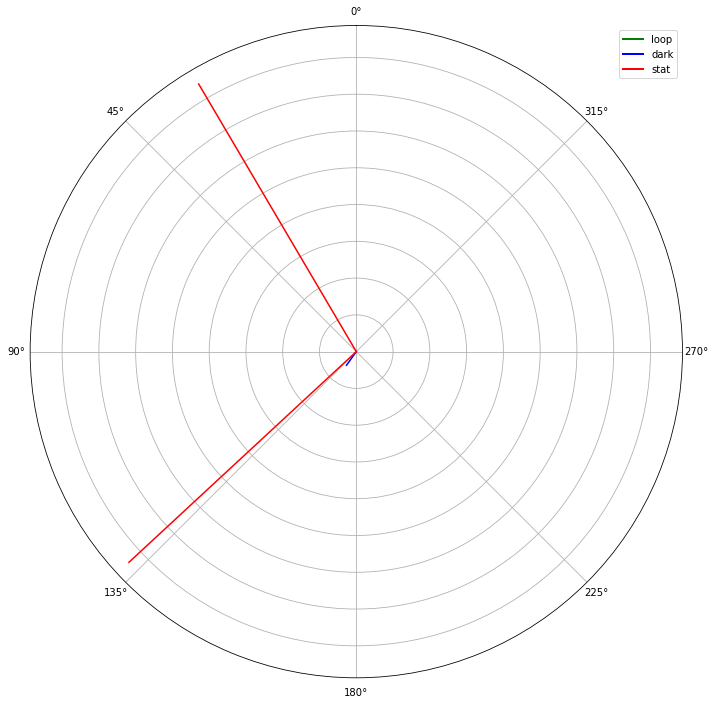

In [7]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(projection = 'polar')
colors = ['g','b','r']
labels = ['loop','dark','stat']
label_color =[["loop",'g'],['dark','b'],['static','r']]
label = ''
color = ''
for count, k in enumerate(groups_static):
    for name_idx in range(len(labels)):
        if labels[name_idx] in k:
            idx = name_idx
            color = label_color[name_idx][1]


    start_f = fem_dict_static[k][0]
    end_f = fem_dict_static[k][1]
    vec_str , mean_drxn = polarplt.calc_mean_and_vector_strength(df_fem_static['fly heading'][start_f:end_f])
    print(f"{k}\n Vector Strength:{round(vec_str,3)}, Mean Heading: {np.rad2deg(round(mean_drxn,3))}")
    # print(f"Female Fly Data {df_fem_dat['delta-t'].loc[start_f]}-{df_fem_dat['delta-t'][end_f]}:")
    # print('Vector Strength:',vec_str,'\t','Mean Direction:',mean_drxn,'rads',np.rad2deg(mean_drxn),'degrees')
    # plt.polar(mean_drxn,vec_str,marker = 'o')
    ax.plot((0,mean_drxn),(0,vec_str), color = color,label = labels[name_idx])
    ax.set_yticklabels([])
plt.legend(colors, labels)
# print(leg.legend_handles)
# leg.legendHandles[0].set_color('green')
# leg.legendHandles[1].set_color('blue')
# leg.legendHandles[2].set_color('red')
legend_elements = [Line2D([0], [0], color=color, lw=2, label=label) for color, label in zip(colors, labels)]
ax.legend(handles = legend_elements)
ax.set_theta_zero_location("N")
plt.savefig('figs/polar_plot_static.svg',facecolor = 'white')
plt.show()

Female Fly Vector Strength and Mean Heading
-----------------------------

Female Fly Data 0.5347781181335449-60.83820700645447:
Vector Strength: 0.04568907324891547 	 Mean Direction: 0.1608927230920331 rads 9.218473987540536 degrees
Female Fly Data 181.12469911575317-301.43710494041443:
Vector Strength: 0.8447396911336787 	 Mean Direction: 4.459265187249993 rads 255.49707495903934 degrees
Female Fly Data 301.37479400634766-421.72846007347107:
Vector Strength: 0.8429189110382885 	 Mean Direction: 6.245056955103957 rads 357.81540634627754 degrees


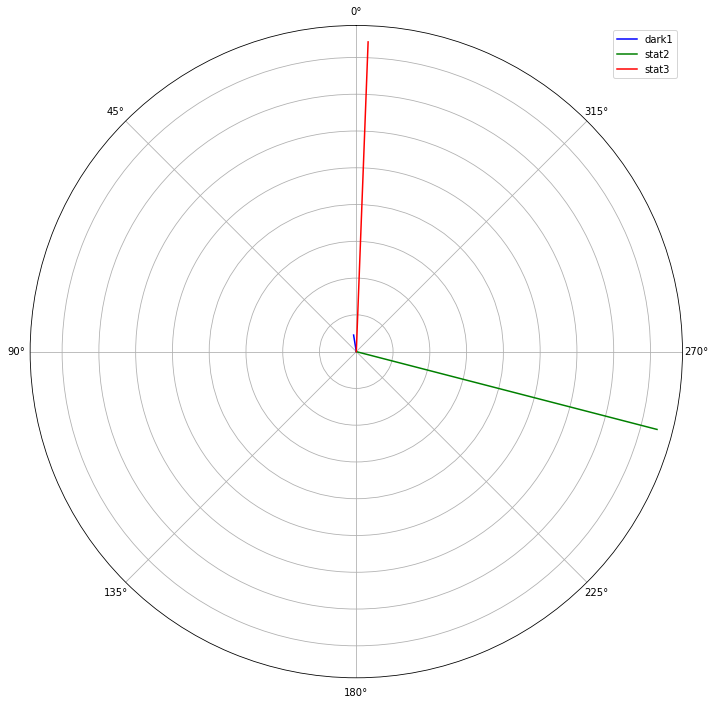

In [43]:
print("Female Fly Vector Strength and Mean Heading\n-----------------------------\n")
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(projection = 'polar')
colors = ['b','g','r']
for count, k in enumerate(groups_static):
    ## start and end for female fly
    start_f = fem_dict_static[k][0]
    end_f = fem_dict_static[k][1]
    vec_str , mean_drxn = polarplt.calc_mean_and_vector_strength(df_fem_static['fly heading'][start_f:end_f]-start_led_angle) ## Apply Shift? Subtract
    print(f"Female Fly Data {df_fem_static['delta-t'].loc[start_f]}-{df_fem_static['delta-t'][end_f]}:")
    print('Vector Strength:',vec_str,'\t','Mean Direction:',mean_drxn,'rads',np.rad2deg(mean_drxn),'degrees')
    # plt.polar(mean_drxn,vec_str,marker = 'o')
    ax.plot((0,mean_drxn),(0,vec_str), color = colors[count],label = k.split('_')[0])
    ax.set_yticklabels([])
    
ax.legend()
ax.set_theta_zero_location("N")
plt.savefig('figs/polar_plot_static.svg',facecolor = 'white')
plt.show()

## 2. Loop Data Analysis -> Apply additional algorithm for fixing the jumps up that should be wrapping..

#### 2.1 Data Import

In [8]:
# data source
fem_dat_loop ='data/20231121124749.txt'
# convert to dataframe
df_fem_loop = pd.read_csv(fem_dat_loop, names = ['time','fly heading','led position'],sep = " ")

# compute change over time
df_fem_loop['delta-t'] = df_fem_loop['time'] - df_fem_loop['time'][0] 

# compute LED position in degrees
df_fem_loop['led angle'] = np.rad2deg(get_LED_angle_in_rad(df_fem_loop['led position'])) 

# get subgroups
fem_dict_loop = sub_exp_group(df_fem_loop)
print(fem_dict_loop)
print(len(fem_dict_loop))

-1 -1 [0, 9]
dark
[9, None]
150 150 [9, 946]

147
3 3 [946, 1075]
3 3 [1074, 1202]
3 4 [1201, 1331]
4 3 [1330, 1456]
3 3 [1455, 1583]
3 3 [1582, 1707]
3 3 [1706, 1836]
3 3 [1835, 1964]
3 3 [1963, 2091]
3 3 [2090, 2217]
3 3 [2216, 2344]
3 3 [2343, 2471]
3 3 [2470, 2599]
3 3 [2598, 2727]
3 50 [2726, 2763]
50 3 [2762, 4689]
3 3 [4688, 4813]
3 3 [4812, 4937]
3 4 [4936, 5063]
4 3 [5062, 5188]
3 3 [5187, 5316]
3 3 [5315, 5444]
3 3 [5443, 5571]
3 3 [5570, 5698]
3 3 [5697, 5825]
3 3 [5824, 5953]
3 3 [5952, 6079]
3 4 [6078, 6203]
4 3 [6202, 6326]
3 3 [6325, 6449]
3 14 [6448, 6485]
14 150 [6484, 8384]
150 150 [8383, 9312]
{'cali1': [0, 9], 'dark1': [9, 946], 'loop1': [946, 1075], 'loop2': [1074, 1202], 'loop3': [1201, 1331], 'loop4': [1330, 1456], 'loop5': [1455, 1583], 'loop6': [1582, 1707], 'loop7': [1706, 1836], 'loop8': [1835, 1964], 'loop9': [1963, 2091], 'loop10': [2090, 2217], 'loop11': [2216, 2344], 'loop12': [2343, 2471], 'loop13': [2470, 2599], 'loop14': [2598, 2727], 'loop15': [2726, 

#### 2.2 Initial Plot of Section of Loop Experiment

Text(0, 0.5, 'Heading/LED Angle')

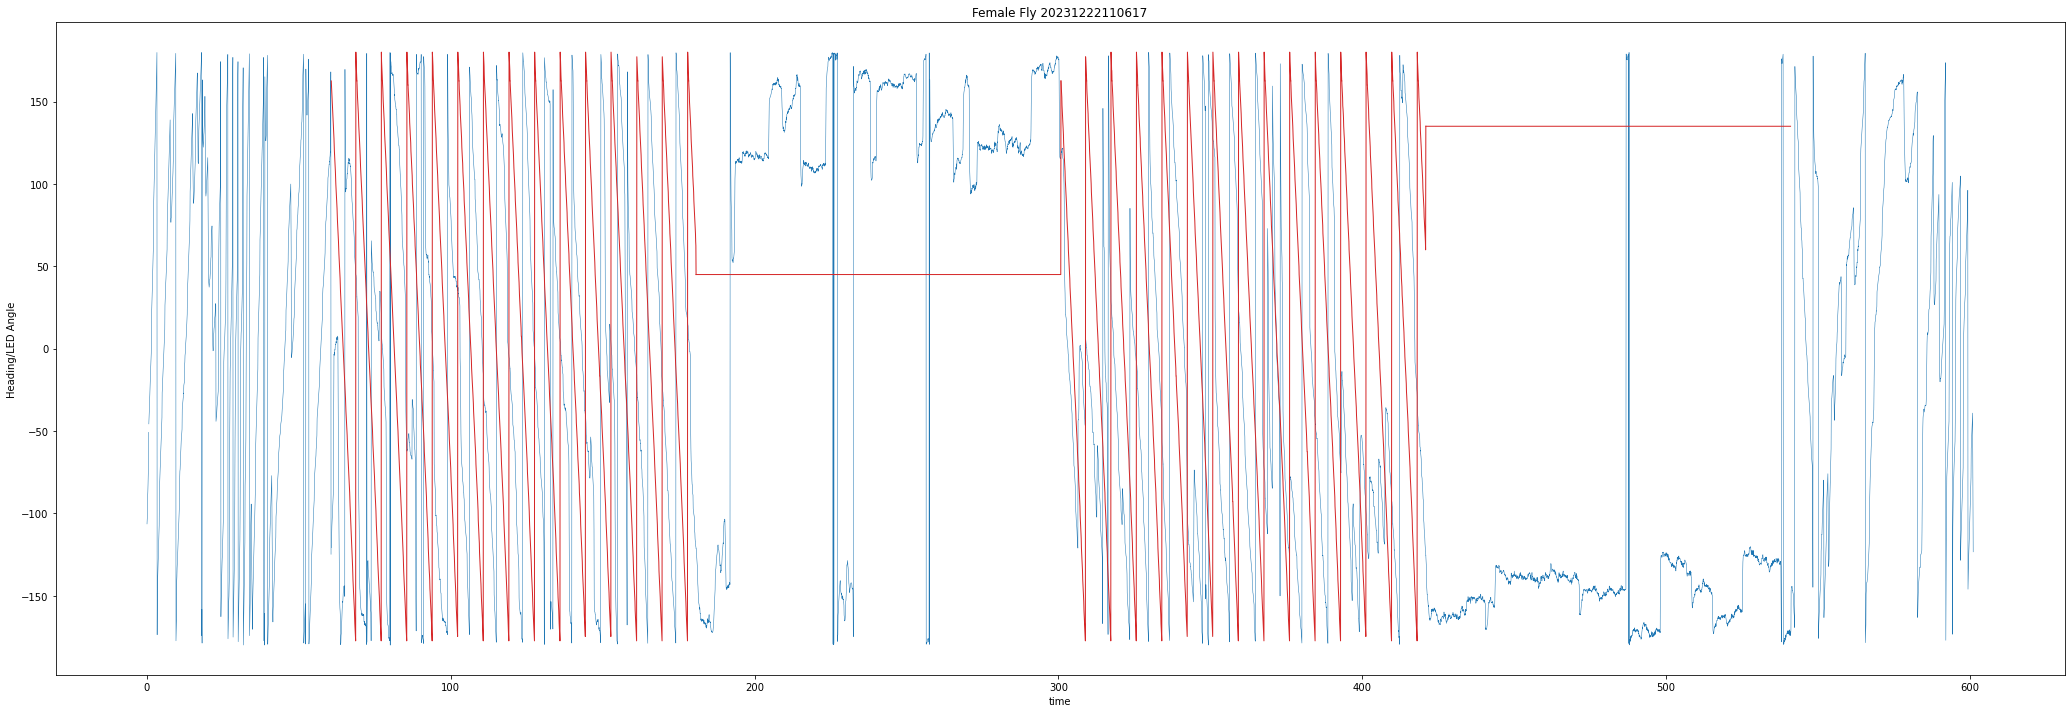

In [9]:
plt.figure(figsize=(36,12))
# iterate over the sections
for k in list(fem_dict_loop.keys()):
    start = fem_dict_loop[k][0]
    end = fem_dict_loop[k][1]
    # print(start,end)
    plt.plot(df_fem_loop['delta-t'][start:end],df_fem_loop['fly heading'][start:end],color = 'tab:blue', linewidth = .5, label = 'Heading')
    plt.plot(df_fem_loop['delta-t'][start:end],df_fem_loop['led angle'][start:end],color = 'tab:red', linewidth = 1, label = 'LED')
plt.title("Female Fly 20231222110617")
plt.xlabel("time")
plt.ylabel("Heading/LED Angle")

### 2.3 Plot of Section of Data In Question

In [10]:
start_idx,_= fem_dict_loop[find_startdata('stat',1,df_fem_loop, fem_dict_loop)]
_,end_idx  = fem_dict_loop[find_enddata('stat',2,df_fem_loop, fem_dict_loop)]
print(start_idx,end_idx)

2762 8384


([<matplotlib.axis.YTick at 0x15cc94bd1f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

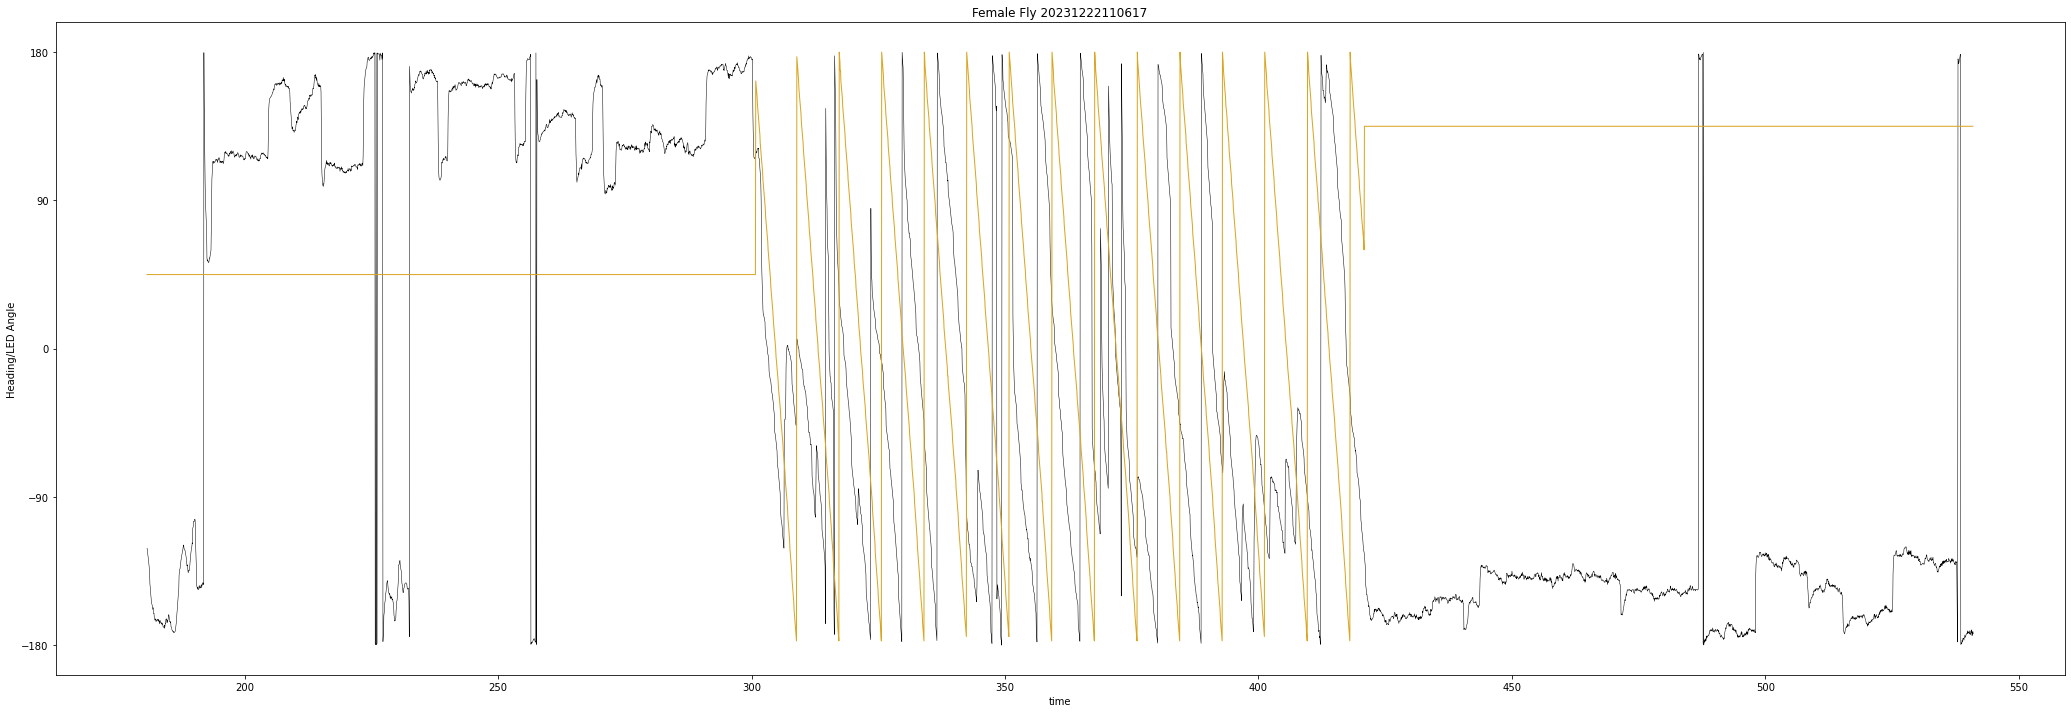

In [11]:
plt.figure(figsize=(36,12))
plt.plot(df_fem_loop['delta-t'][start_idx:end_idx],df_fem_loop['fly heading'][start_idx:end_idx],color = 'k', linewidth = .5, label = 'Heading')
plt.plot(df_fem_loop['delta-t'][start_idx:end_idx],df_fem_loop['led angle'][start_idx:end_idx],color = 'goldenrod', linewidth = 1, label = 'LED')
plt.title("Female Fly 20231222110617")
plt.xlabel("time")
plt.ylabel("Heading/LED Angle")
plt.yticks(np.arange(-180,181,90))

In [12]:
# get the subgroups that are appropriate for the current selection:
idx1 = (list(fem_dict_loop.keys())).index(find_startdata('stat',1,df_fem_loop, fem_dict_loop))
idx2 = (list(fem_dict_loop.keys())).index(find_enddata('stat',2,df_fem_loop, fem_dict_loop))
sub_groups = list(fem_dict_loop.keys())[idx1:idx2+1]
sub_groups

['stat1',
 'loop16',
 'loop17',
 'loop18',
 'loop19',
 'loop20',
 'loop21',
 'loop22',
 'loop23',
 'loop24',
 'loop25',
 'loop26',
 'loop27',
 'loop28',
 'loop29',
 'loop30',
 'stat2']

#### 2.3 Plot of Female Fly Data Relative To LED

##### Not Adjusted

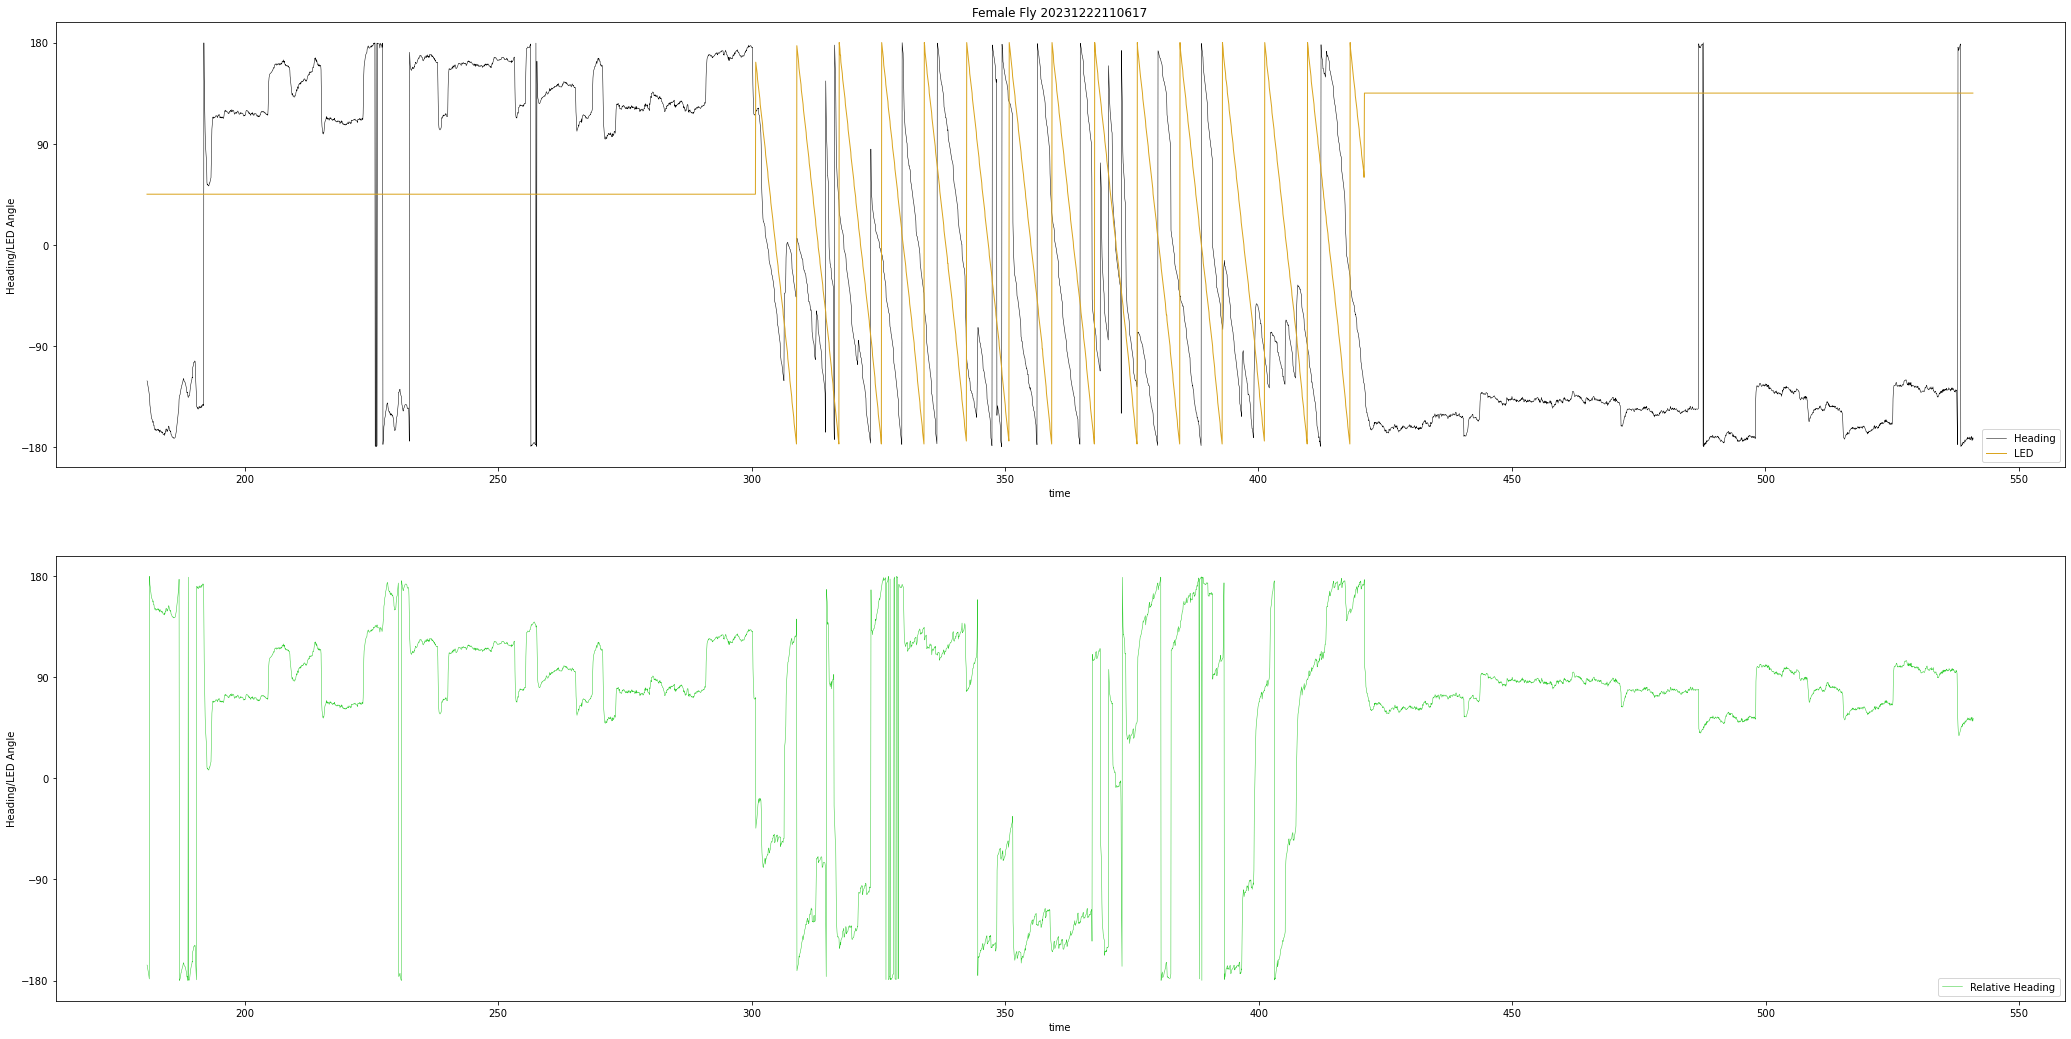

In [13]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(36,18))

# Main Plot 
ax1.plot(df_fem_loop['delta-t'][start_idx:end_idx],df_fem_loop['fly heading'][start_idx:end_idx],color = 'k', linewidth = .5, label = 'Heading')
ax1.plot(df_fem_loop['delta-t'][start_idx:end_idx],df_fem_loop['led angle'][start_idx:end_idx],color = 'goldenrod', linewidth = 1, label = 'LED')
ax1.set_title("Female Fly 20231222110617")
ax1.set_xlabel("time")
ax1.set_ylabel("Heading/LED Angle")
ax1.set_yticks(np.arange(-180,181,90))
ax1.legend(loc = "lower right")

# Offset
ax2.plot(df_fem_loop['delta-t'][start_idx:end_idx],polarplt.deg360to180_arr(df_fem_loop['fly heading'][start_idx:end_idx]-df_fem_loop['led angle'][start_idx:end_idx]),color = 'limegreen', linewidth = .5, label = 'Relative Heading')
ax2.set_xlabel("time")
ax2.set_ylabel("Heading/LED Angle")
ax2.set_yticks(np.arange(-180,181,90))
ax2.legend(loc = "lower right")

# Save Figure
plt.savefig('figs/offset_loop.svg',facecolor = 'white')

##### Adjusted with the First Static LED Set to Zero

Starting LED: 50 45.0


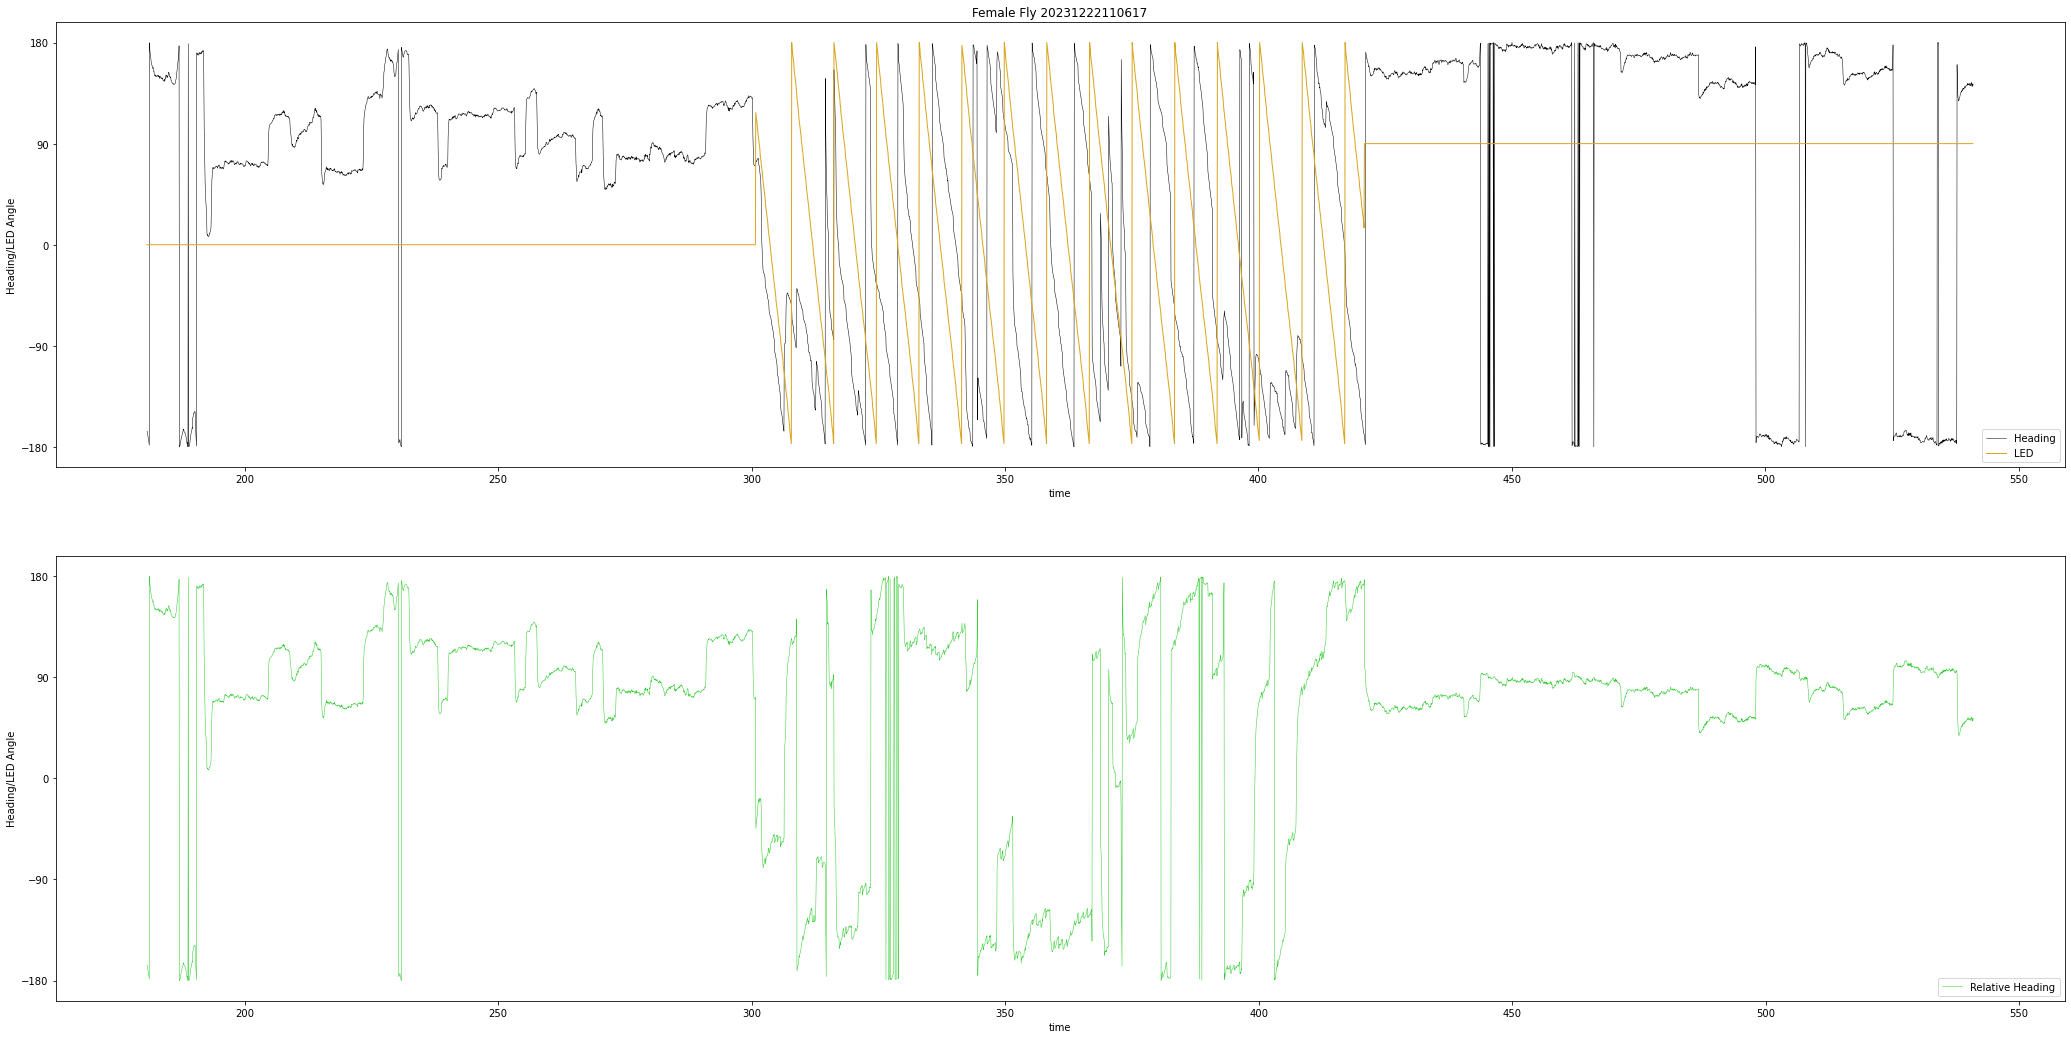

In [14]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(36,18))
start_led,start_led_angle = bsc_sec.get_led_position(start_idx,df_fem_loop)
print("Starting LED:",start_led,start_led_angle)
# Main Plot 
ax1.plot(df_fem_loop['delta-t'][start_idx:end_idx],polarplt.deg360to180_arr(df_fem_loop['fly heading'][start_idx:end_idx]-start_led_angle),color = 'k', linewidth = .5, label = 'Heading')
ax1.plot(df_fem_loop['delta-t'][start_idx:end_idx],polarplt.deg360to180_arr(df_fem_loop['led angle'][start_idx:end_idx]-start_led_angle),color = 'goldenrod', linewidth = 1, label = 'LED')
ax1.set_title("Female Fly 20231222110617")
ax1.set_xlabel("time")
ax1.set_ylabel("Heading/LED Angle")
ax1.set_yticks(np.arange(-180,181,90))
ax1.legend(loc = "lower right")

# Offset
ax2.plot(df_fem_loop['delta-t'][start_idx:end_idx],polarplt.deg360to180_arr(((df_fem_loop['fly heading'][start_idx:end_idx]-start_led_angle)-(df_fem_loop['led angle'][start_idx:end_idx]-start_led_angle))),color = 'limegreen', linewidth = .5, label = 'Relative Heading')
ax2.set_xlabel("time")
ax2.set_ylabel("Heading/LED Angle")
ax2.set_yticks(np.arange(-180,181,90))
ax2.legend(loc = "lower right")

# Save Figure
plt.savefig('figs/offset_loop_adj.svg',facecolor = 'white')

#### 2.4 Polar Plot for Loop Data (No LED Adjustment...)

##### Create a Single Group for the Loop Data -> Create More Automated Process...Keep this for now

In [15]:
start, end = sub_groups[0],sub_groups[-1]
loop_start_idx = fem_dict_loop[start][1]
loop_end_idx = fem_dict_loop[end][0]
print(loop_start_idx,loop_end_idx)
# plt.plot(df_fem_loop['delta-t'][loop_start_idx:loop_end_idx],df_fem_loop['led angle'][loop_start_idx:loop_end_idx],color = 'goldenrod', linewidth = 1, label = 'LED')
polar_loop_dict = {
    'stat1':fem_dict_loop['stat1'],
    'loop':[loop_start_idx,loop_end_idx],
    'stat2':fem_dict_loop['stat2']
}

4689 6484


##### Plot

stat1
 Vector Strength:0.83, Mean Heading: 102.50214954890427
loop
 Vector Strength:0.436, Mean Heading: 176.9866629159113
stat2
 Vector Strength:0.966, Mean Heading: 76.71904876801723


C:\Users\lkrow\AppData\Local\Temp\ipykernel_35604\525178164.py:24: UserWarning: Legend does not support 'g' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(colors, labels)
C:\Users\lkrow\AppData\Local\Temp\ipykernel_35604\525178164.py:24: UserWarning: Legend does not support 'b' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(colors, labels)
C:\Users\lkrow\AppData\Local\Temp\ipykernel_35604\525178164.py:24: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(colors, labels)


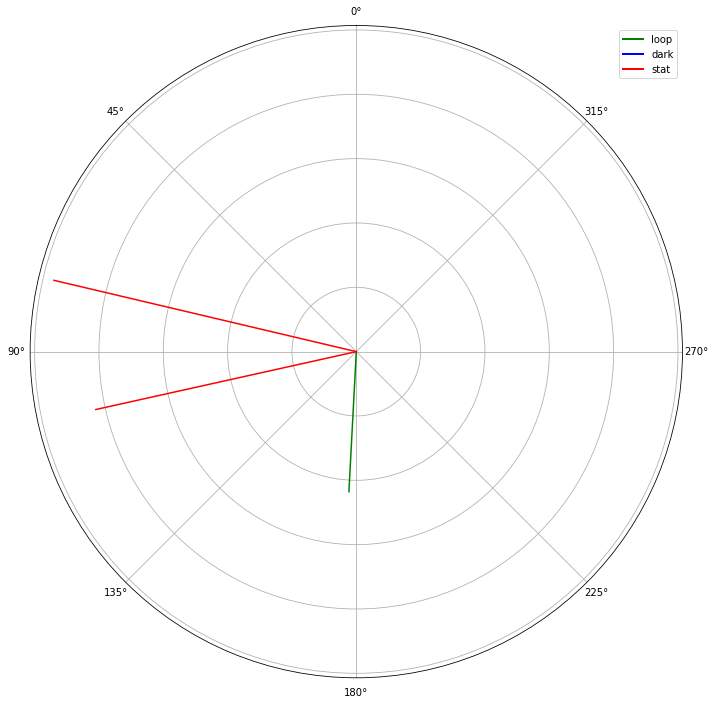

In [16]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(projection = 'polar')
colors = ['g','b','r']
labels = ['loop','dark','stat']
label_color =[["loop",'g'],['dark','b'],['static','r']]
label = ''
color = ''
for count, k in enumerate(polar_loop_dict.keys()):
    for name_idx in range(len(labels)):
        if labels[name_idx] in k:
            idx = name_idx
            color = label_color[name_idx][1]


    start_f = polar_loop_dict[k][0]
    end_f = polar_loop_dict[k][1]
    vec_str , mean_drxn = polarplt.calc_mean_and_vector_strength(df_fem_loop['fly heading'][start_f:end_f]-df_fem_loop['led angle'][start_f:end_f])
    print(f"{k}\n Vector Strength:{round(vec_str,3)}, Mean Heading: {np.rad2deg(round(mean_drxn,3))}")
    # print(f"Female Fly Data {df_fem_dat['delta-t'].loc[start_f]}-{df_fem_dat['delta-t'][end_f]}:")
    # print('Vector Strength:',vec_str,'\t','Mean Direction:',mean_drxn,'rads',np.rad2deg(mean_drxn),'degrees')
    # plt.polar(mean_drxn,vec_str,marker = 'o')
    ax.plot((0,mean_drxn),(0,vec_str), color = color,label = labels[name_idx])
    ax.set_yticklabels([])
plt.legend(colors, labels)
# print(leg.legend_handles)
# leg.legendHandles[0].set_color('green')
# leg.legendHandles[1].set_color('blue')
# leg.legendHandles[2].set_color('red')
legend_elements = [Line2D([0], [0], color=color, lw=2, label=label) for color, label in zip(colors, labels)]
ax.legend(handles = legend_elements)
ax.set_theta_zero_location("N")
plt.savefig('figs/polar_plot_loop.svg',facecolor = 'white')
plt.show()

## WRAPPING

- To Address the wrapping issue what will be attempted is essentially looking for locations where there is a jump from -170 to 180 +....
    -  split your data into two series at the discontinuity 
- Other method is gradient descent to try and get rid of those artifact lines...


In [53]:
start_idx,end_idx

(2762, 8384)

In [59]:
split_idx = (np.where(np.isclose(np.abs(np.diff(df_fem_loop['fly heading'][start_idx:end_idx])),360,atol = 20))[0]+1)+2762
print(split_idx)

[3491 3494 3495 3498 3516 3600 3983 3999 4000 4002 4917 5116 5220 5386
 5415 5520 5649 5881 6010 6359 7548 7549 7550 8335 8344]


In [66]:
sub_idx_groups = []
data_arr = np.arange(start_idx,end_idx)
start
for count, i in enumerate(split_idx):
    if count == 0:
        sub_idx_groups.append([start_idx,i])
    elif count == len(split_idx)-1:
        sub_idx_groups.append([i,end_idx])
    else: 
        sub_idx_groups.append([i, split_idx[count+1]])
sub_idx_groups




[[2762, 3491],
 [3494, 3495],
 [3495, 3498],
 [3498, 3516],
 [3516, 3600],
 [3600, 3983],
 [3983, 3999],
 [3999, 4000],
 [4000, 4002],
 [4002, 4917],
 [4917, 5116],
 [5116, 5220],
 [5220, 5386],
 [5386, 5415],
 [5415, 5520],
 [5520, 5649],
 [5649, 5881],
 [5881, 6010],
 [6010, 6359],
 [6359, 7548],
 [7548, 7549],
 [7549, 7550],
 [7550, 8335],
 [8335, 8344],
 [8344, 8384]]

Text(0, 0.5, 'Heading/LED Angle')

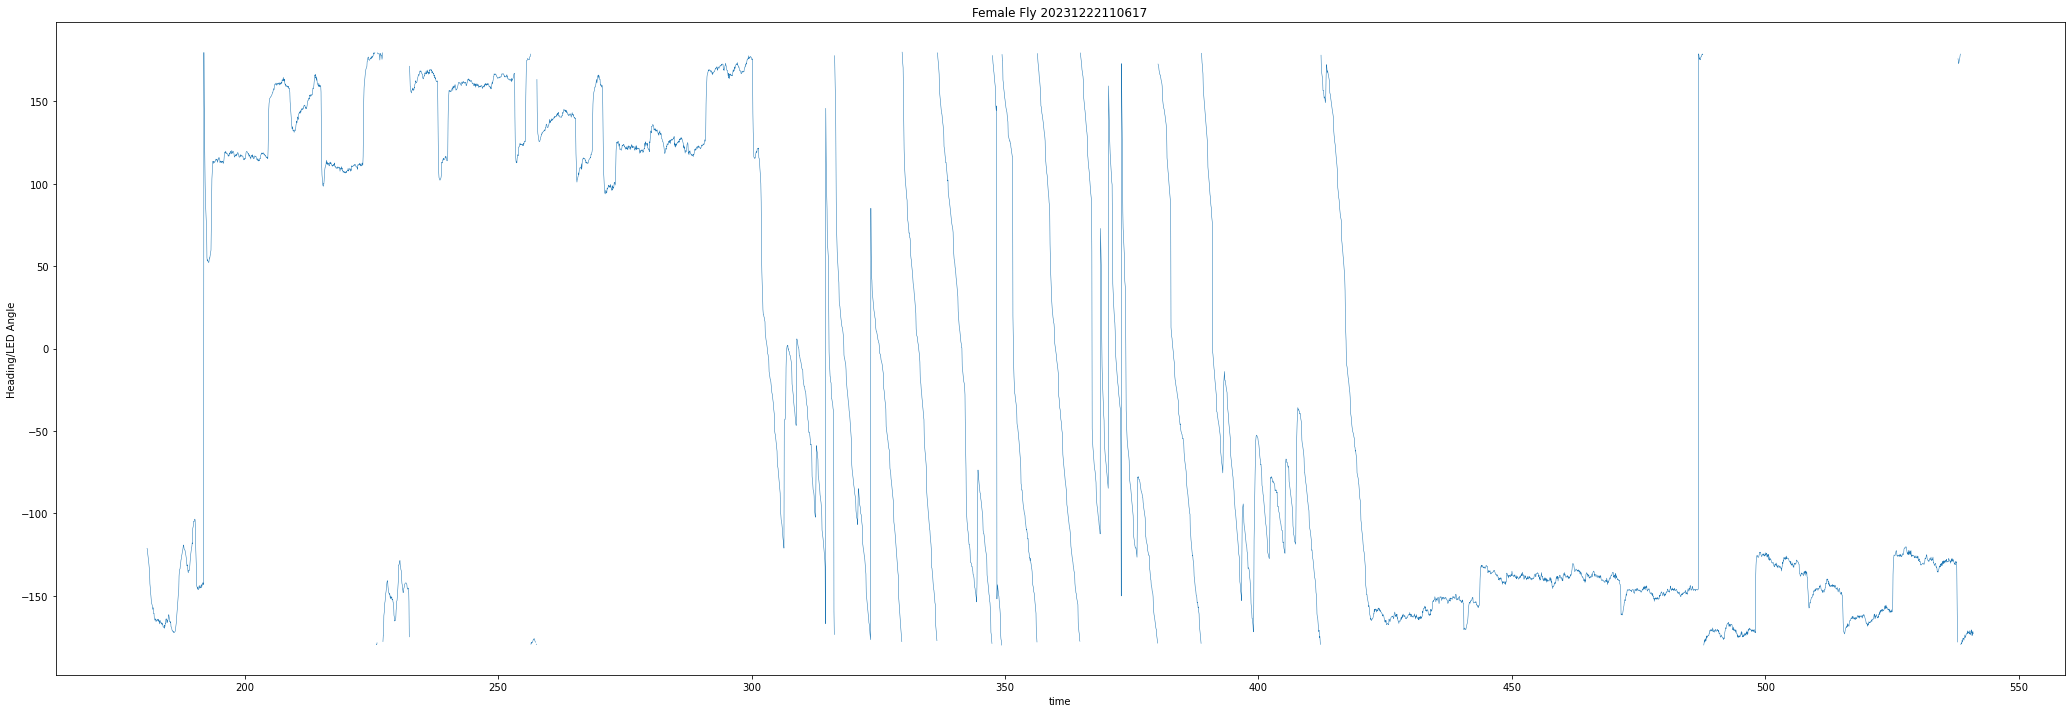

In [67]:
plt.figure(figsize=(36,12))
# iterate over the sections
for k in range(len(sub_idx_groups)):
    start = sub_idx_groups[k][0]
    end = sub_idx_groups[k][1]
    # print(start,end)
    plt.plot(df_fem_loop['delta-t'][start:end],df_fem_loop['fly heading'][start:end],color = 'tab:blue', linewidth = .5, label = 'Heading')
    # plt.plot(df_fem_loop['delta-t'][start:end],df_fem_loop['led angle'][start:end],color = 'tab:red', linewidth = 1, label = 'LED')
plt.title("Female Fly 20231222110617")
plt.xlabel("time")
plt.ylabel("Heading/LED Angle")